## Audio Signal Feature Extraction

**Feature Extraction basics**

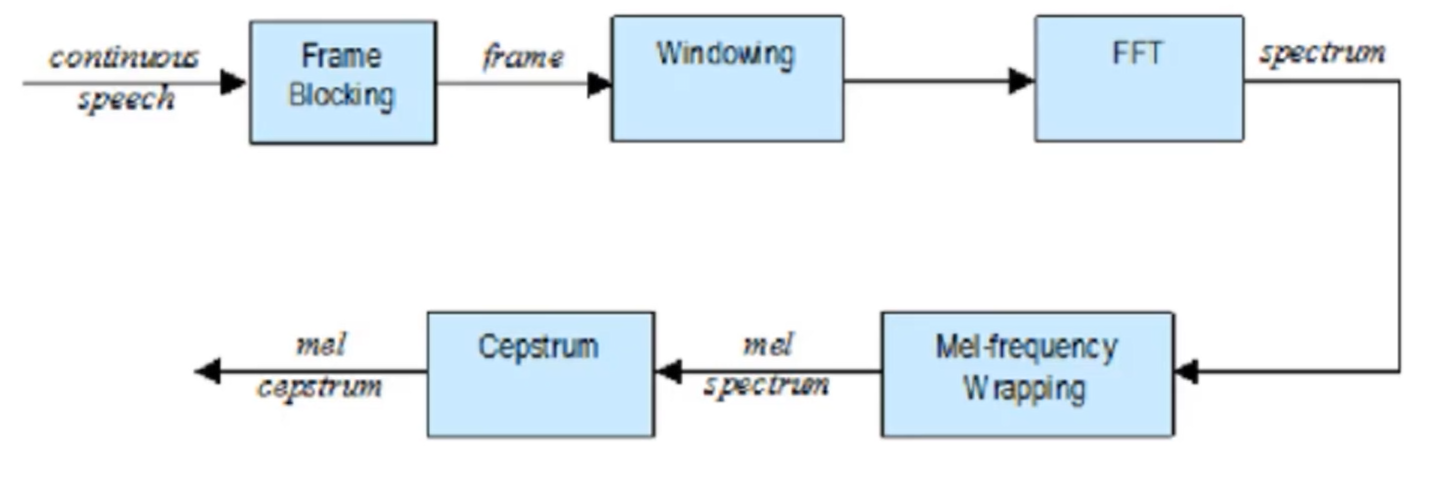

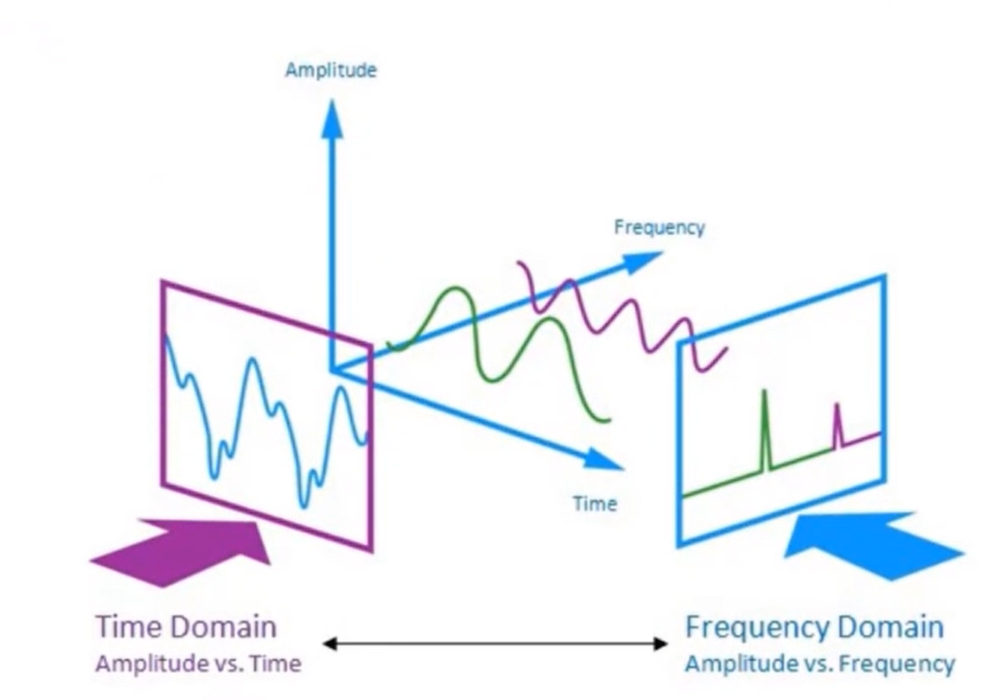

**Install important libraries. PyAudio is a package used to listen the audio file. It gives start and end button.**

In [38]:
!pip install numba==0.48
!pip install librosa
!pip install PyAudio

**Including Libraries and packages. "display" library is used to display our audio signals.**

In [43]:
import librosa
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import librosa.display 

**Loading an Audio. "librosa.load" helps in loading the audio file. "x" will give only one dimensional vector of our music file, "sr" is called Sampling Rate, by default librosa gives Sampling Rate as 22 KHz, can specify "sr= None" or "sr = 44100" (override) inside librosa.load as a parameter.**

In [51]:
audio_path = r"C:\Users\DELL\Downloads\Audio\Audio+File+Analysis\Audio File Analysis\harvard.wav"
x,sr  = librosa.load(audio_path)
print(type(x),type(sr))

<class 'numpy.ndarray'> <class 'int'>


**Playing an Audio.**

In [52]:
import IPython.display as ipd

In [53]:
ipd.Audio(audio_path)

**Plot the Signal. Waveform gives a plot between amplitude vs time domain.**

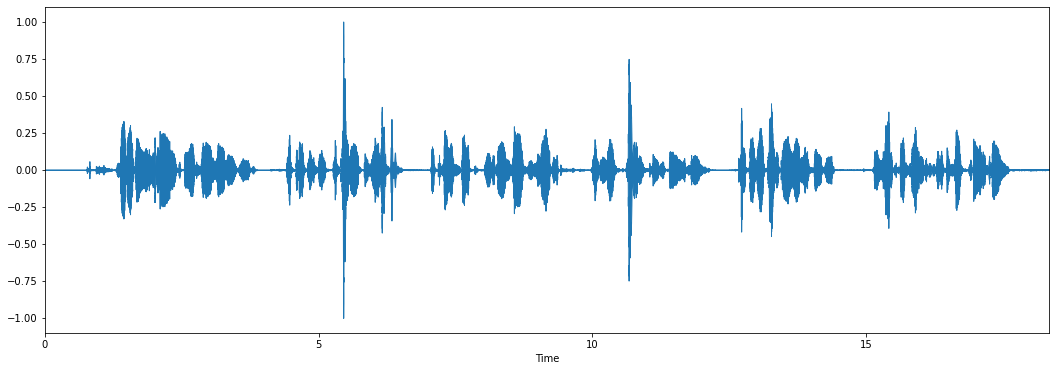

In [54]:
plt.figure(figsize=(18,6))
librosa.display.waveplot(x,sr=sr)
plt.show()

**Display Spectrogram. Determine in amplitude vs frequency domain. "stft" is Short-Time Fourier Transform, transforms from Time domain to Frequency domain.**

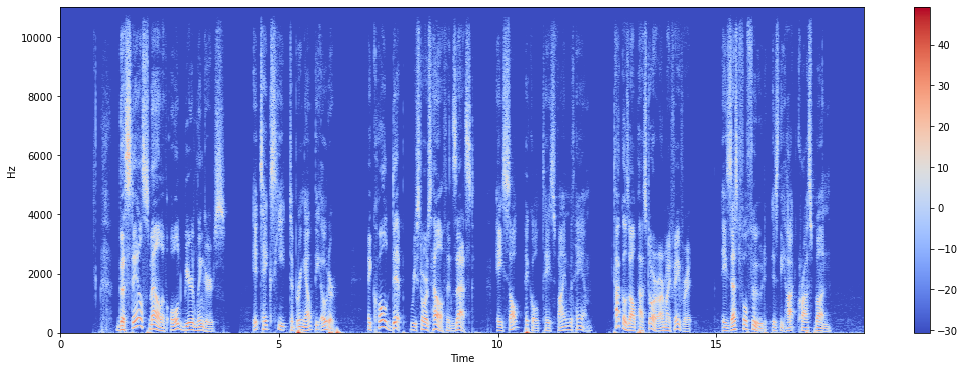

In [62]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(18,6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

**Zooming in and find Zero Crossing Rate (at what rate is it crossing the signal from positive to negative).**

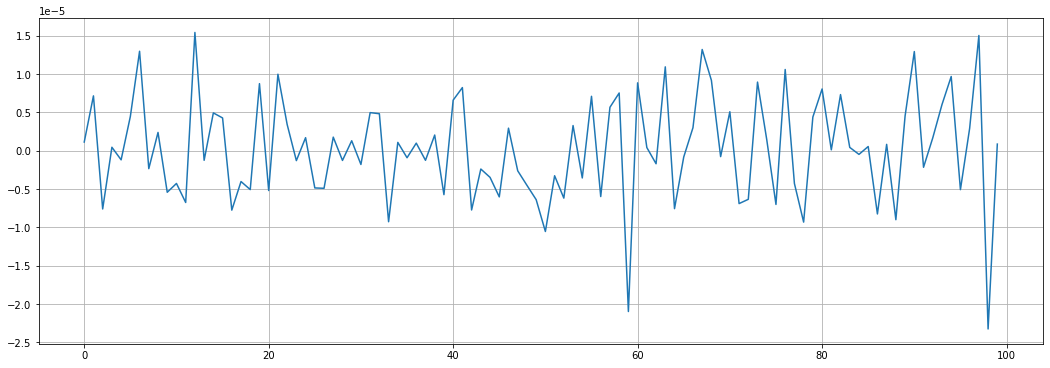

In [64]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(18,6))
plt.plot(x[n0:n1])
plt.grid()

**We can count the number of time this wave is crossing 0 from positive to negative or vice-versa.**

In [65]:
zero_crossings = librosa.zero_crossings(x[n0:n1],pad = False)
print(sum(zero_crossings))

64


**Spectral Centroid -- Centre of Mass -- Weighted mean of the frequencies present in the sound.**

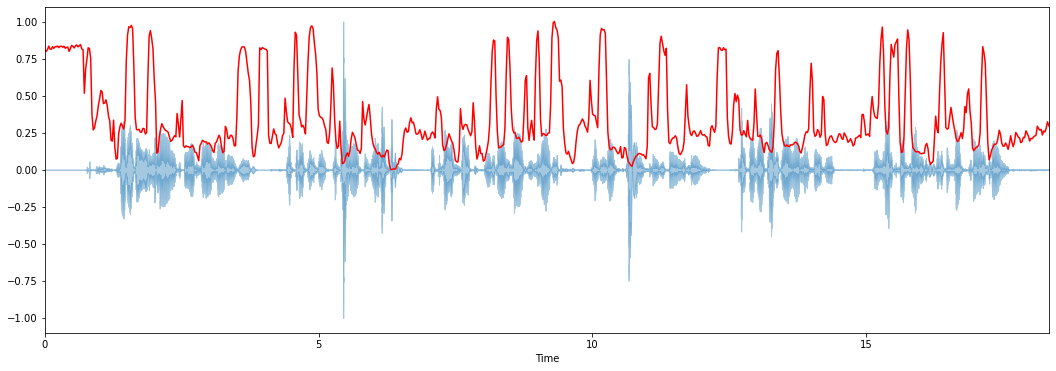

In [67]:
spectral_centroids= librosa.feature.spectral_centroid(x,sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x,axis=0):
    return sklearn.preprocessing.minmax_scale(x,axis=axis)
plt.figure(figsize=(18,6))
librosa.display.waveplot(x,sr=sr,alpha=0.4)
plt.plot(t,normalize(spectral_centroids),color = "r")
plt.show()

**Spectral RollOff.**

[]

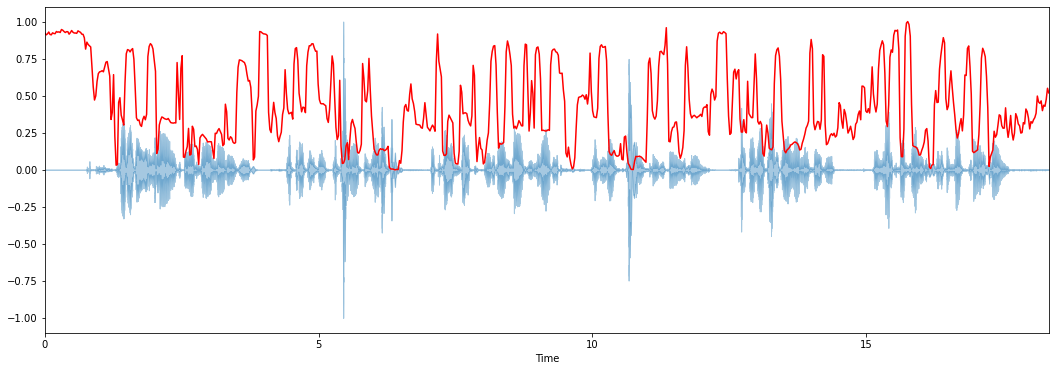

In [68]:
spectral_rolloff = librosa.feature.spectral_rolloff(x,sr=sr)[0]
plt.figure(figsize=(18,6))
librosa.display.waveplot(x,sr=sr,alpha=0.4)
plt.plot(t,normalize(spectral_rolloff),color='r')
plt.plot()

**MFCC - Mel-Frequency Cepstral Coefficients.**

(20, 791)


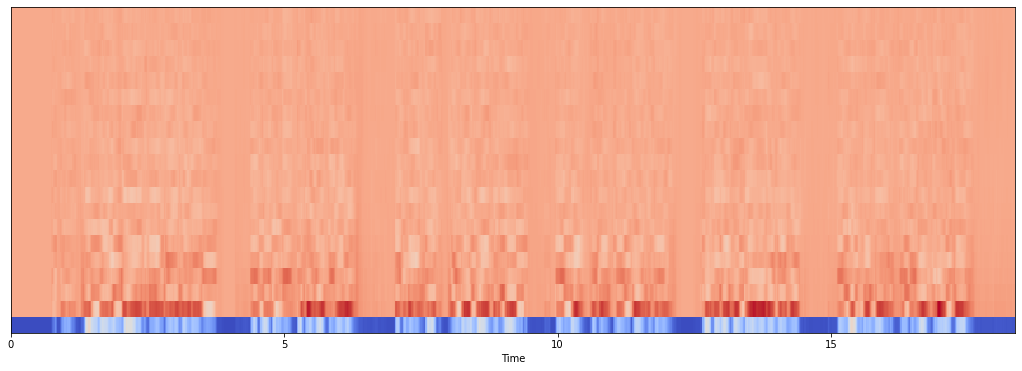

In [69]:
mfcc = librosa.feature.mfcc(x,sr=sr)
print(mfcc.shape)
plt.figure(figsize=(18,6))
librosa.display.specshow(mfcc,sr=sr,x_axis="time")
plt.show()

**20 is mfcc, number of frames it has is 791.**